In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
os.chdir("C:\\Users\\HP\\Desktop")
os.getcwd()

'C:\\Users\\HP\\Desktop'

In [10]:
data = pd.read_csv('superstore.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [11]:
def standardize_dates(date_column):
    standardized_dates = []
    for date in date_column:
        try:
            standardized_dates.append(pd.to_datetime(date, format="%d-%m-%Y"))
        except ValueError:
            try:
                standardized_dates.append(pd.to_datetime(date, format="%m-%d-%Y"))
            except ValueError:
                standardized_dates.append(pd.NaT)
    return pd.Series(standardized_dates)

In [13]:
data['Order Date'] = standardize_dates(data['Order Date'])
invalid_dates = data[data['Order Date'].isnull()]
if not invalid_dates.empty:
    print("Rows with invalid dates (unrecoverable):")
    print(invalid_dates)

In [14]:
data = data.dropna(subset=['Order Date'])
data['Order Date'] = data['Order Date'].dt.strftime('%Y-%m-%d')
print("First few rows after date standardization:")
print(data.head())

First few rows after date standardization:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  16-06-2016    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  18-10-2015  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  18-10-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Ca

In [15]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
sales_data = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
sales_data['Order Date'] = sales_data['Order Date'].dt.to_timestamp()
sales_data

,Order Date,Sales
0,2014-01-01,14236.8950
1,2014-02-01,4519.8920
2,2014-03-01,55691.0090
3,2014-04-01,28295.3450
4,2014-05-01,23648.2870
5,2014-06-01,34595.1276
6,2014-07-01,33946.3930
7,2014-08-01,27909.4685
8,2014-09-01,81777.3508
9,2014-10-01,31453.3930


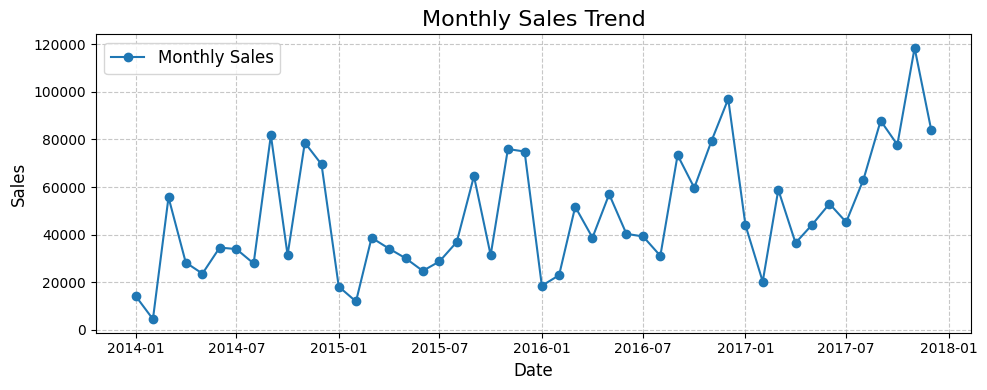

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(sales_data['Order Date'], sales_data['Sales'], marker='o', label='Monthly Sales')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [17]:
sales_data['Time Index'] = np.arange(len(sales_data))
coefficients = np.polyfit(sales_data['Time Index'], sales_data['Sales'], 1)
trend_line = np.polyval(coefficients, sales_data['Time Index'])

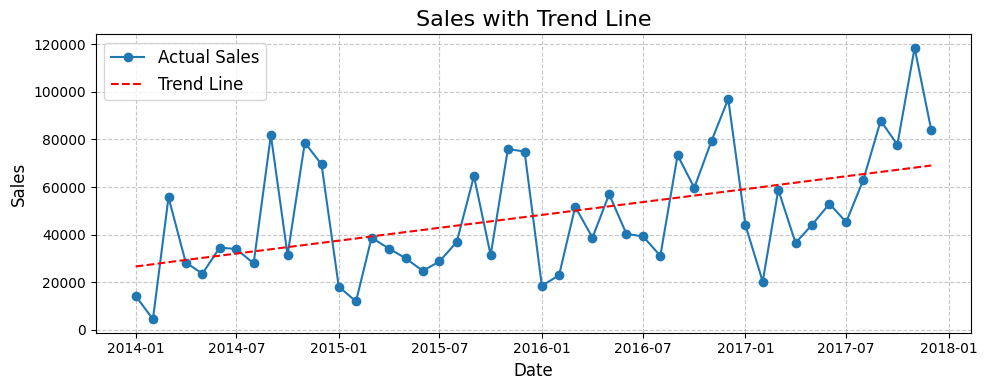

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(sales_data['Order Date'], sales_data['Sales'], marker='o', label='Actual Sales')
plt.plot(sales_data['Order Date'], trend_line, color='r', linestyle='--', label='Trend Line')
plt.title('Sales with Trend Line', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
future_dates = pd.date_range(start=sales_data['Order Date'].iloc[-1] + pd.offsets.MonthBegin(1),periods=12, freq='MS')
future_time_index = np.arange(len(sales_data), len(sales_data) + len(future_dates))
future_sales = np.polyval(coefficients, future_time_index)

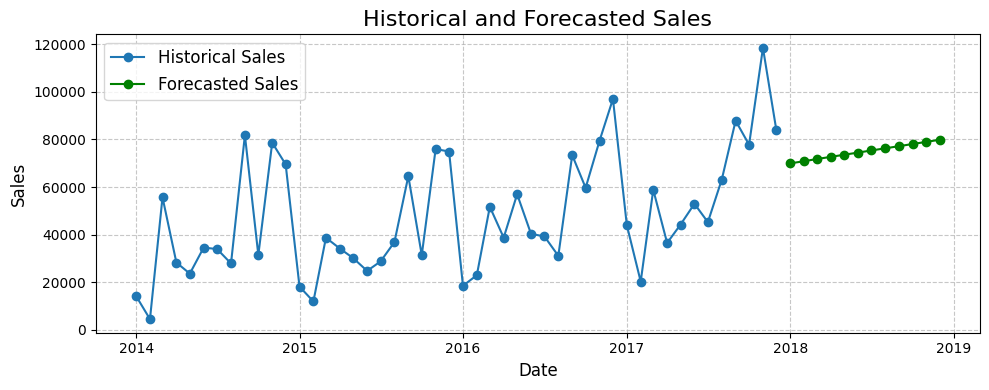

In [12]:
future_forecast = pd.DataFrame({
    'Order Date': future_dates,
    'Predicted Sales': future_sales
})

plt.figure(figsize=(10, 4))
plt.plot(sales_data['Order Date'], sales_data['Sales'], marker='o', label='Historical Sales')
plt.plot(future_forecast['Order Date'], future_forecast['Predicted Sales'], marker='o', color='g', label='Forecasted Sales')
plt.title('Historical and Forecasted Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [13]:
print("Forecasted Sales for the Next 12 Months:")
print(future_forecast)

Forecasted Sales for the Next 12 Months:
   Order Date  Predicted Sales
0  2018-01-01     69957.535798
1  2018-02-01     70859.543330
2  2018-03-01     71761.550862
3  2018-04-01     72663.558395
4  2018-05-01     73565.565927
5  2018-06-01     74467.573459
6  2018-07-01     75369.580992
7  2018-08-01     76271.588524
8  2018-09-01     77173.596056
9  2018-10-01     78075.603589
10 2018-11-01     78977.611121
11 2018-12-01     79879.618653
